In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import sys

In [4]:
from sklearn.datasets import load_boston

In [5]:
boston_data = load_boston()

In [6]:
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
df.shape

(506, 13)

In [9]:
X = df

In [10]:
y = boston_data.target

In [11]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

<b><b>  Statsmodels</b></b>

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

We need to add a constant term to allow statsmodel.api to calculate the bias/intercepts

$y = mX$

$y = mX + c$

In [13]:
X_constant = sm.add_constant(X)

/Users/anilkhadwal/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [14]:
pd.DataFrame(X_constant)

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [15]:
sm.OLS?


Init signature: sm.OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
Docstring:     
A simple ordinary least squares model.


Parameters
----------
endog : array-like
    1-d endogenous response variable. The dependent variable.
exog : array-like
    A nobs x k array where `nobs` is the number of observations and `k`
    is the number of regressors. An intercept is not included by default
    and should be added by the user. See
    :func:`statsmodels.tools.add_constant`.
missing : str
    Available options are 'none', 'drop', and 'raise'. If 'none', no nan
    checking is done. If 'drop', any observations with nans are dropped.
    If 'raise', an error is raised. Default is 'none.'
hasconst : None or bool
    Indicates whether the RHS includes a user-supplied constant. If True,
    a constant is not checked for and k_constant is set to 1 and all
    result statistics are calculated as if a constant is present. If
    False, a constant is not checked for and k_constant is 

In [16]:
form_lr = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=df)
mlr = form_lr.fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 26 Jun 2020   Prob (F-statistic):          6.72e-135
Time:                        12:53:10   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***


<b>Correlation Matrix</b>

Useful diagnostic tool to identify collinearity between predictors

In [17]:
pd.options.display.float_format = '{:,.2f}'.format
corr_matrix = df.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54


In [18]:
corr_matrix[np.abs(corr_matrix) < 0.6]=0
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.63,0.00,0.00,0.00,0.00
ZN,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00
INDUS,0.00,0.00,1.00,0.00,0.76,0.00,0.64,-0.71,0.00,0.72,0.00,0.00,0.60
CHAS,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NOX,0.00,0.00,0.76,0.00,1.00,0.00,0.73,-0.77,0.61,0.67,0.00,0.00,0.00
RM,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.61
AGE,0.00,0.00,0.64,0.00,0.73,0.00,1.00,-0.75,0.00,0.00,0.00,0.00,0.60
DIS,0.00,0.66,-0.71,0.00,-0.77,0.00,-0.75,1.00,0.00,0.00,0.00,0.00,0.00
RAD,0.63,0.00,0.00,0.00,0.61,0.00,0.00,0.00,1.00,0.91,0.00,0.00,0.00
TAX,0.00,0.00,0.72,0.00,0.67,0.00,0.00,0.00,0.91,1.00,0.00,0.00,0.00


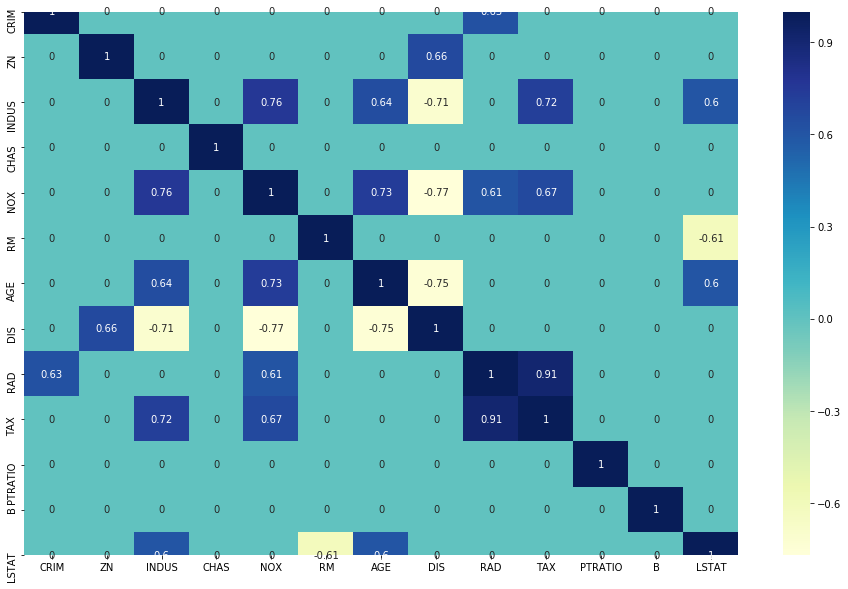

In [19]:
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

<b>Detecting Collinearity with Eignvectors</b>

Eigenvalues are simply the coefficients attached to eigenvectors, which give the axes magnitude. In this case, they are the measure of the data's covariance. By ranking your eigenvectors in order of their eigenvalues, highest to lowest, you get the principal components in order of significance.

$Matrix * EignVector = EignValue * EignVector $ 

In [20]:
eignvalues, eignvectors = np.linalg.eig(df.corr())

In [21]:
pd.options.display.float_format = '{:,.4f}'.format
pd.Series(eignvalues).sort_values()

8    0.0635
10   0.1693
11   0.1860
12   0.2202
9    0.2769
7    0.3961
6    0.5354
5    0.6574
4    0.8348
3    0.8576
2    1.2426
1    1.4333
0    6.1268
dtype: float64

Note that index 8, eignvalues of 0.063, is near to zero or very small compared to others. Small value represents presence of collinearity.

In [22]:
np.abs(pd.Series(eignvectors[:,8])).sort_values(ascending=False)

9    0.7202
8    0.6335
2    0.2511
1    0.0809
0    0.0460
5    0.0456
4    0.0436
6    0.0386
3    0.0359
12   0.0244
10   0.0234
7    0.0183
11   0.0045
dtype: float64

Note that index 9,8,2 have very high loading when compared against the rest

In [23]:
print(df.columns[2], df.columns[8], df.columns[9])

INDUS RAD TAX


<b>Revisiting feature importance and Extractions</b>

Check:

    1. Direction of the coefficient

    2. Impact of the variable/factor on the model

In [24]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0063,18.0000,2.3100,0.0000,0.5380,6.5750,65.2000,4.0900,1.0000,296.0000,15.3000,396.9000,4.9800
1,0.0273,0.0000,7.0700,0.0000,0.4690,6.4210,78.9000,4.9671,2.0000,242.0000,17.8000,396.9000,9.1400
2,0.0273,0.0000,7.0700,0.0000,0.4690,7.1850,61.1000,4.9671,2.0000,242.0000,17.8000,392.8300,4.0300
3,0.0324,0.0000,2.1800,0.0000,0.4580,6.9980,45.8000,6.0622,3.0000,222.0000,18.7000,394.6300,2.9400
4,0.0691,0.0000,2.1800,0.0000,0.4580,7.1470,54.2000,6.0622,3.0000,222.0000,18.7000,396.9000,5.3300


(array([ 54., 100., 108.,  32.,  74.,   1.,   0.,   0.,   0., 137.]),
 array([187. , 239.4, 291.8, 344.2, 396.6, 449. , 501.4, 553.8, 606.2,
        658.6, 711. ]),
 <a list of 10 Patch objects>)

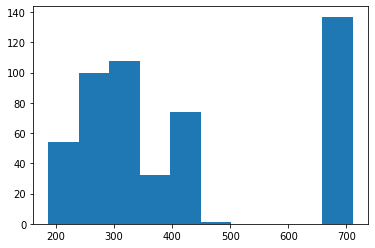

In [25]:
plt.hist(df['TAX'])

(array([75., 80., 89., 60., 78., 30., 57., 21.,  0., 16.]),
 array([0.385 , 0.4336, 0.4822, 0.5308, 0.5794, 0.628 , 0.6766, 0.7252,
        0.7738, 0.8224, 0.871 ]),
 <a list of 10 Patch objects>)

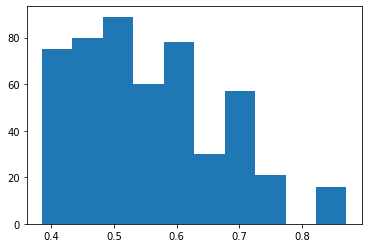

In [26]:
plt.hist(df['NOX'])

scale of above 2 factors is quite large which is going to suppress coefficient itself

****

<b>Standardise Variable to Identify Key features</b>

In order to perform point 2 properly, one needs to standardise the variable

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression()

In [30]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
result = pd.DataFrame(list(zip(model.coef_,df.columns)), columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values(by='coefficient', ascending=False)


,coefficient
name,
NOX,17.7666
RM,3.8099
CHAS,2.6867
DIS,1.4756
PTRATIO,0.9527
LSTAT,0.5248
RAD,0.3060
CRIM,0.1080
ZN,0.0464


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
standard_coefficient_linear_reg = make_pipeline(scaler, model)

In [36]:
standard_coefficient_linear_reg.fit(X, y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [37]:
result = pd.DataFrame(list(zip(model.coef_,df.columns)), columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values(by='coefficient', ascending=False)

,coefficient
name,
LSTAT,3.7436
DIS,3.1040
RM,2.6742
RAD,2.6622
TAX,2.0768
PTRATIO,2.0606
NOX,2.0567
ZN,1.0816
CRIM,0.9281


<b>Using R^2 to Identify key features</b>

  - Compare R^2 of model against R^2 of model without a feature

 -  A singnificant change in R^2 signify the importance of the feature.

In [38]:
from sklearn.metrics import r2_score

In [39]:
linear_reg = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM+ AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=df)

In [40]:
benchmark = linear_reg.fit()

In [41]:
r2_score(y, benchmark.predict(df))

0.7406426641094095

 now calculating without LSTAT

In [42]:
linear_reg = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM+ AGE + DIS + RAD + TAX + PTRATIO + B', data=df)
lr_without_LSTAT = linear_reg.fit()
r2_score(y, lr_without_LSTAT.predict(df))

0.6842042799773889

 now calculating without AGE

In [43]:
linear_reg = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=df)
lr_without_AGE = linear_reg.fit()
r2_score(y, lr_without_AGE.predict(df))

0.7406412165505145

we can see that AGE doesn't have that much impact over the prediction